# Implementing Overlapping Clustering using K means

#### Import numpy, sci-kit learn and pyplot libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import csv

#### Generate some random data for demonstration

In [ ]:
np.random.seed(0)
X = np.random.rand(100, 2)

#### Elbow Curve to select appropriate K value

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

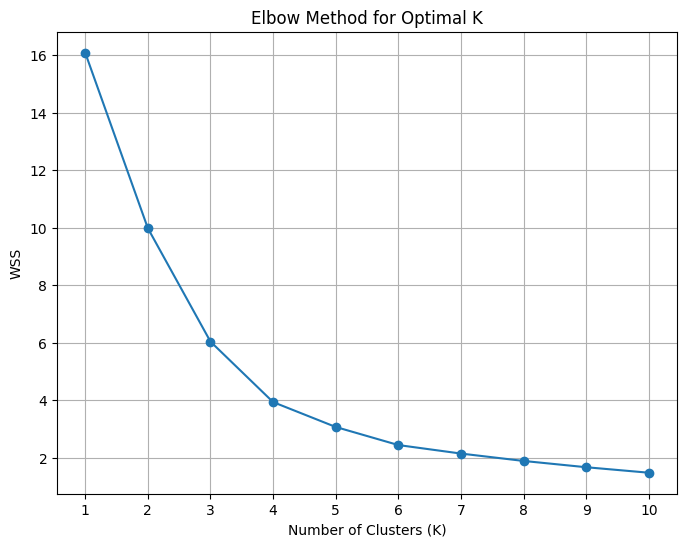

In [ ]:
k_values = range(1, 11)

# Calculate within sum of squares
WSS = [KMeans(n_clusters=k, random_state=42).fit(X).inertia_ for k in k_values]

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, WSS, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WSS')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Declare number of clusters and Initialize K means

In [ ]:
K = 5 # Number of clusters

kmeans = KMeans(n_clusters=K) # Initialize K-means

kmeans.fit(X) # Fit K-means to the data

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

#### Get the cluster centers and labels

In [ ]:
cluster_centers = kmeans.cluster_centers_

labels = kmeans.labels_
labels

array([3, 3, 3, 3, 1, 1, 3, 0, 2, 3, 1, 3, 2, 2, 4, 2, 3, 2, 3, 1, 0, 4,
       3, 0, 0, 4, 4, 0, 4, 4, 0, 4, 0, 4, 4, 1, 1, 4, 0, 0, 0, 2, 4, 4,
       3, 2, 2, 0, 4, 4, 4, 3, 2, 3, 2, 3, 4, 1, 1, 1, 1, 1, 3, 0, 4, 4,
       0, 3, 3, 4, 1, 3, 1, 2, 3, 2, 2, 2, 1, 0, 1, 3, 1, 0, 4, 4, 0, 4,
       2, 4, 2, 4, 1, 3, 4, 0, 2, 1, 0, 0], dtype=int32)

#### Specify the Cluster Radius

In [ ]:
radius_threshold = 0.3 #cm

#### Assign data points to clusters based on the radius threshold

In [ ]:
cluster_assignments = []
for data_point in X:
    assigned_clusters = []
    for center in cluster_centers:
        distance = np.linalg.norm(data_point - center)
        if distance < radius_threshold:
            assigned_clusters.append(center)
    cluster_assignments.append(assigned_clusters)

#### Plot the clusters

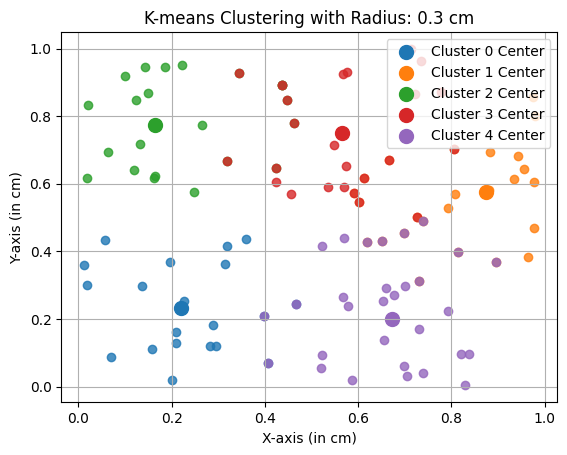

In [ ]:
# Plotting data points:
for i in range(len(cluster_assignments)):
    x, y = X[i]
    for cluster in cluster_assignments[i]:
        cluster_idx = np.where((cluster_centers == cluster).all(axis=1))[0][0]
        plt.scatter(x, y, c=f'C{cluster_idx}', marker='o', alpha = 0.8)

# Plotting cluster centroids:
for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=f'C{i}', marker='o', s=100, label=f'Cluster {i} Center')

# Plotting labels:
plt.title('K-means Clustering with Radius: '+str(radius_threshold)+' cm')
plt.xlabel('X-axis (in cm)')
plt.ylabel('Y-axis (in cm)')
plt.legend()
plt.grid(True)
plt.show()

#### Create a csv file and store result

In [ ]:
cluster_assignments

[[array([0.5657981 , 0.74940753])],
 [array([0.87476243, 0.57426438]), array([0.5657981 , 0.74940753])],
 [array([0.16375103, 0.77407668]), array([0.5657981 , 0.74940753])],
 [array([0.16375103, 0.77407668]), array([0.5657981 , 0.74940753])],
 [array([0.87476243, 0.57426438])],
 [array([0.87476243, 0.57426438])],
 [array([0.5657981 , 0.74940753])],
 [array([0.21917611, 0.23366988])],
 [array([0.16375103, 0.77407668])],
 [array([0.5657981 , 0.74940753])],
 [array([0.87476243, 0.57426438])],
 [array([0.16375103, 0.77407668]), array([0.5657981 , 0.74940753])],
 [array([0.16375103, 0.77407668])],
 [array([0.16375103, 0.77407668])],
 [array([0.67285524, 0.20068933])],
 [array([0.16375103, 0.77407668])],
 [array([0.5657981 , 0.74940753])],
 [array([0.16375103, 0.77407668])],
 [array([0.87476243, 0.57426438]), array([0.5657981 , 0.74940753])],
 [array([0.87476243, 0.57426438])],
 [array([0.21917611, 0.23366988])],
 [array([0.67285524, 0.20068933])],
 [array([0.87476243, 0.57426438]), array([0

In [ ]:
df = pd.DataFrame(X, columns = ['Attribute_1', 'Attribute_2'])
df['Cluster_assigned(With overlapping)'] = cluster_assignments
df['K means clustering'] = labels
df
df.to_csv('output.csv')

#### Evaluate the stability of clustering solutions using the Jaccard similarity coefficient.

In [ ]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances

In [ ]:
def jaccard_similarity(cluster_labels1, cluster_labels2):
    intersection = np.sum(cluster_labels1 == cluster_labels2)
    union = len(cluster_labels1) + len(cluster_labels2) - intersection
    return intersection / union

In [ ]:
def cluster_stability(data, n_clusters, n_runs=10):
    similarities = []
    for _ in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, random_state=None).fit(data)
        similarities.append(jaccard_similarity(kmeans.labels_, kmeans.labels_))
    return np.mean(similarities)

stability_score = cluster_stability(X, n_clusters=3, n_runs=10)
print("Cluster Stability Score:", stability_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Cluster Stability Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Clustering Iris Dataset

### With PCA:

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA

#### Load the Dataset

In [ ]:
iris = sns.load_dataset('iris')
print(iris)

Dataset = iris[['petal_length','petal_width','sepal_length','sepal_width']]

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


#### Apply PCA for the dataset

In [ ]:
if (len(Dataset.columns)) > 2:
# Apply PCA to reduce to 2D
  pca = PCA(n_components=2)
  X = pca.fit_transform(Dataset)
else:
  X = Dataset

In [ ]:
Dataset

,petal_length,petal_width,sepal_length,sepal_width
0,1.4,0.2,5.1,3.5
1,1.4,0.2,4.9,3.0
2,1.3,0.2,4.7,3.2
3,1.5,0.2,4.6,3.1
4,1.4,0.2,5.0,3.6
...,...,...,...,...
145,5.2,2.3,6.7,3.0
146,5.0,1.9,6.3,2.5
147,5.2,2.0,6.5,3.0
148,5.4,2.3,6.2,3.4


#### Elbow curve

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

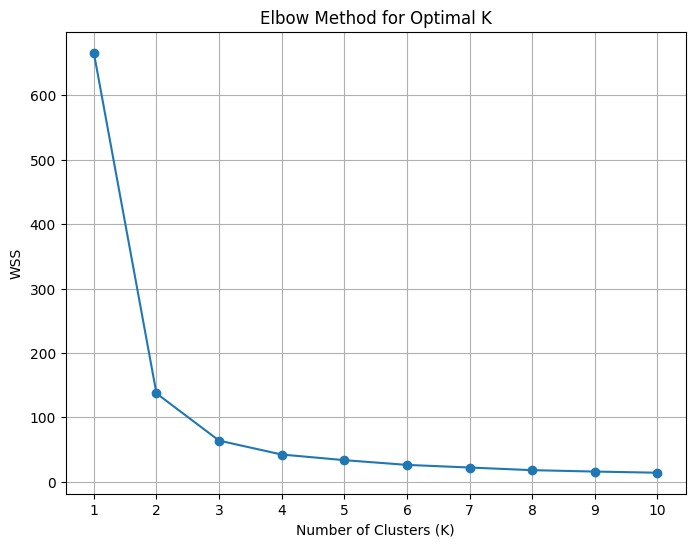

In [ ]:
k_values = range(1, 11)

# Calculate within sum of squares
WSS = [KMeans(n_clusters=k, random_state=42).fit(X).inertia_ for k in k_values]

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, WSS, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WSS')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
pip install gap-stat

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gap-stat: filename=gap_stat-2.0.3-py3-none-any.whl size=6133 sha256=731a24bde9057d2775dac5f00a37ea3b7adbb7b878cceee3013fe1fb51f97397
  Stored in directory: /root/.cache/pip/wheels/e6/75/de/ee29b366258cdeccdacaff94d895b9d2ffc95a486f3b982441
Successfully built gap-stat


In [ ]:
from sklearn.metrics import silhouette_score
from gap_statistic import OptimalK

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Silhouette Score')

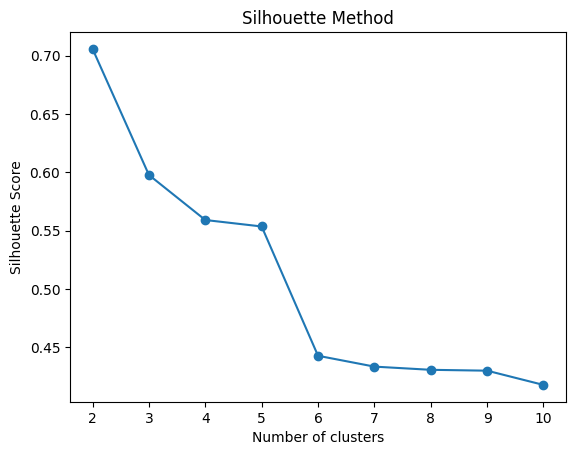

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

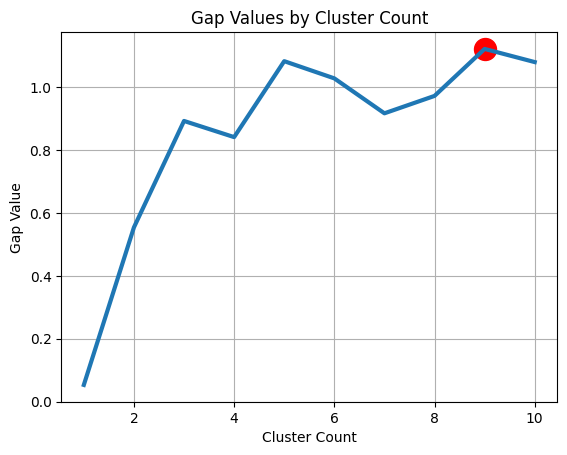

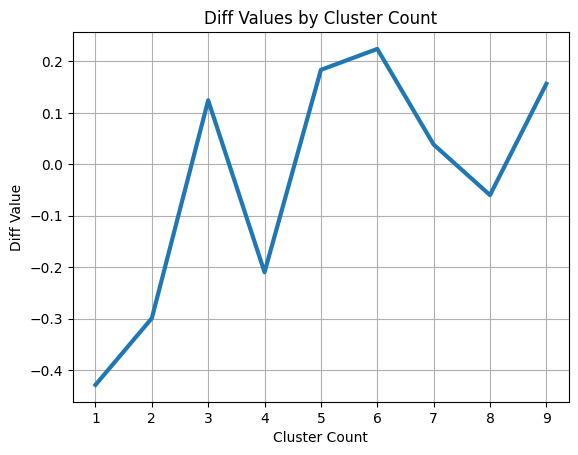

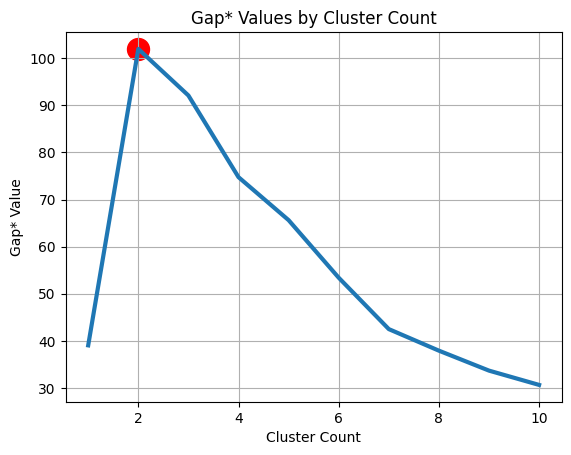

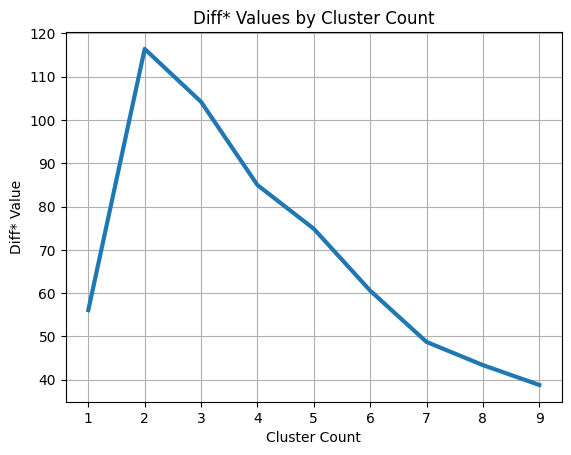

In [ ]:
optimal_k_obj = OptimalK(parallel_backend='joblib')
optimal_k_obj(X, cluster_array=np.arange(1, 11))

optimal_k = optimal_k_obj.n_clusters

optimal_k_obj.plot_results()

In [ ]:
K = 3

kmeans = KMeans(n_clusters=K)

kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

#### Cluster initialization

In [ ]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

#print(cluster_centers)
#print(labels)

radius_threshold = 1.2

In [ ]:
cluster_assignments = []
for data_point in X:
    assigned_clusters = []
    for center in cluster_centers:
        distance = np.linalg.norm(data_point - center)
        if distance < radius_threshold:
            assigned_clusters.append(center)
    cluster_assignments.append(assigned_clusters)

#### Plot graphical visualization of clusters formed

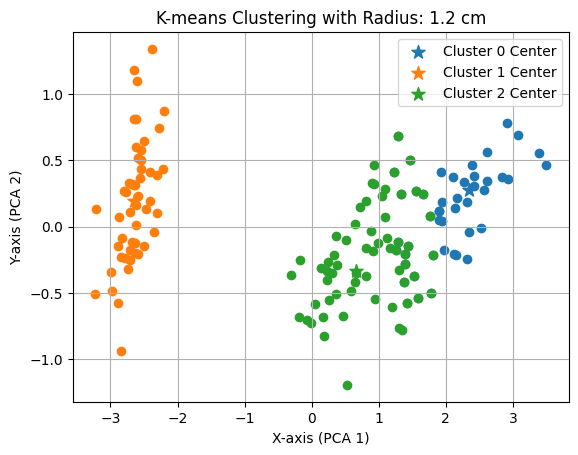

In [ ]:
for i in range(len(cluster_assignments)):
    x, y = X[i]
    for cluster in cluster_assignments[i]:
        cluster_idx = np.where((cluster_centers == cluster).all(axis=1))[0][0]
        plt.scatter(x, y, c=f'C{cluster_idx}', marker='o')

for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=f'C{i}', marker='*', s=100, label=f'Cluster {i} Center')

# Plotting labels:
plt.title('K-means Clustering with Radius: '+str(radius_threshold)+' cm')
plt.xlabel('X-axis (PCA 1)')
plt.ylabel('Y-axis (PCA 2)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# cluster_assignments

In [ ]:
df = pd.DataFrame(X, columns = ['PC_1', 'PC_2'])
df['Cluster_assigned(With overlapping)'] = cluster_assignments
df['K means clustering'] = labels
df['Species'] = iris['species']
df.to_csv('results.csv')

In [ ]:
def jaccard_similarity(cluster_labels1, cluster_labels2):
    intersection = np.sum(cluster_labels1 == cluster_labels2)
    union = len(cluster_labels1) + len(cluster_labels2) - intersection
    return intersection / union

In [ ]:
def cluster_stability(data, n_clusters, n_runs=10):
    similarities = []
    for _ in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, random_state=None).fit(data)
        similarities.append(jaccard_similarity(kmeans.labels_, kmeans.labels_))
    return np.mean(similarities)

stability_score = cluster_stability(X, n_clusters=3, n_runs=10)
print("Cluster Stability Score:", stability_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Cluster Stability Score: 1.0


### Without PCA:

In [ ]:
iris = sns.load_dataset('iris')
print(iris)

Dataset = iris[['petal_length','petal_width','sepal_length','sepal_width']]

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [ ]:
X = Dataset.values
X

array([[1.4, 0.2, 5.1, 3.5],
       [1.4, 0.2, 4.9, 3. ],
       [1.3, 0.2, 4.7, 3.2],
       [1.5, 0.2, 4.6, 3.1],
       [1.4, 0.2, 5. , 3.6],
       [1.7, 0.4, 5.4, 3.9],
       [1.4, 0.3, 4.6, 3.4],
       [1.5, 0.2, 5. , 3.4],
       [1.4, 0.2, 4.4, 2.9],
       [1.5, 0.1, 4.9, 3.1],
       [1.5, 0.2, 5.4, 3.7],
       [1.6, 0.2, 4.8, 3.4],
       [1.4, 0.1, 4.8, 3. ],
       [1.1, 0.1, 4.3, 3. ],
       [1.2, 0.2, 5.8, 4. ],
       [1.5, 0.4, 5.7, 4.4],
       [1.3, 0.4, 5.4, 3.9],
       [1.4, 0.3, 5.1, 3.5],
       [1.7, 0.3, 5.7, 3.8],
       [1.5, 0.3, 5.1, 3.8],
       [1.7, 0.2, 5.4, 3.4],
       [1.5, 0.4, 5.1, 3.7],
       [1. , 0.2, 4.6, 3.6],
       [1.7, 0.5, 5.1, 3.3],
       [1.9, 0.2, 4.8, 3.4],
       [1.6, 0.2, 5. , 3. ],
       [1.6, 0.4, 5. , 3.4],
       [1.5, 0.2, 5.2, 3.5],
       [1.4, 0.2, 5.2, 3.4],
       [1.6, 0.2, 4.7, 3.2],
       [1.6, 0.2, 4.8, 3.1],
       [1.5, 0.4, 5.4, 3.4],
       [1.5, 0.1, 5.2, 4.1],
       [1.4, 0.2, 5.5, 4.2],
       [1.5, 0

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

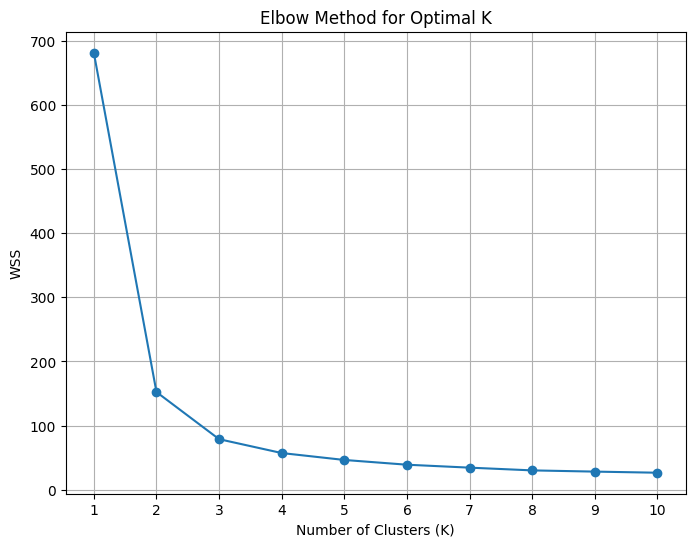

In [ ]:
k_values = range(1, 11)

# Calculate within sum of squares
WSS = [KMeans(n_clusters=k, random_state=42).fit(X).inertia_ for k in k_values]

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, WSS, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WSS')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_values)
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Silhouette Score')

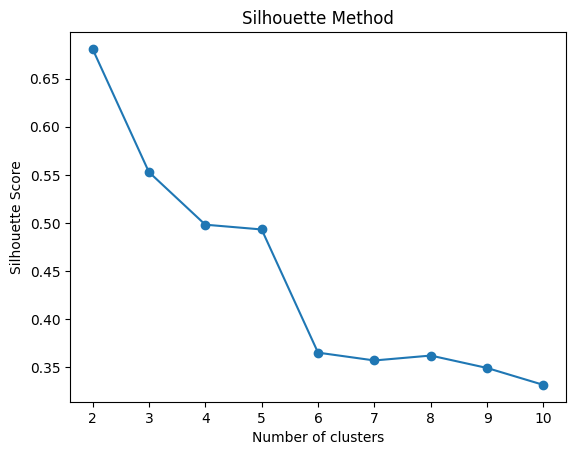

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

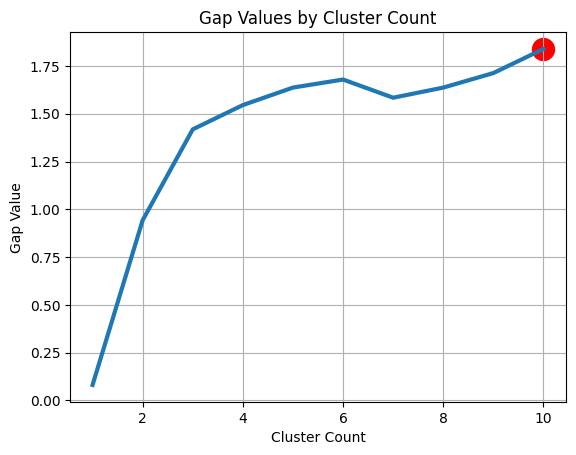

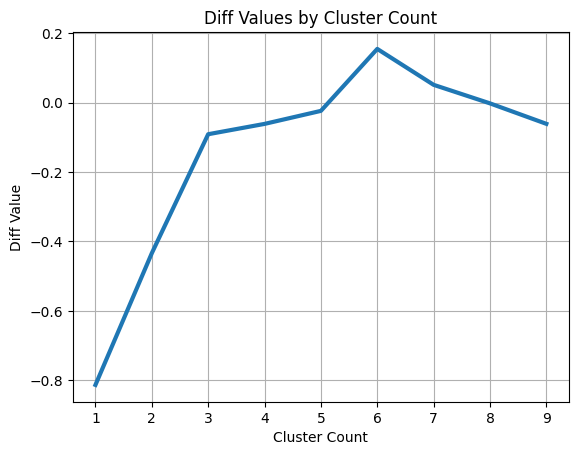

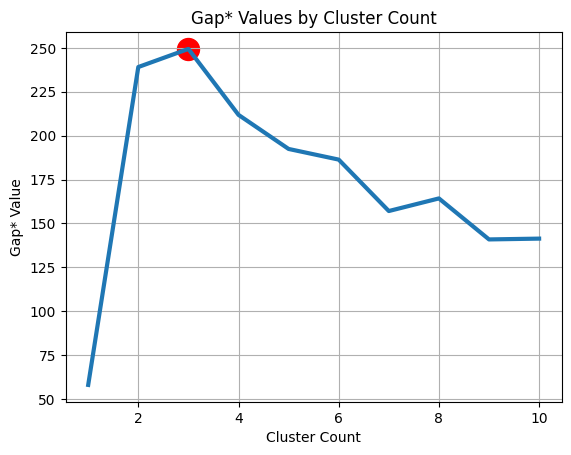

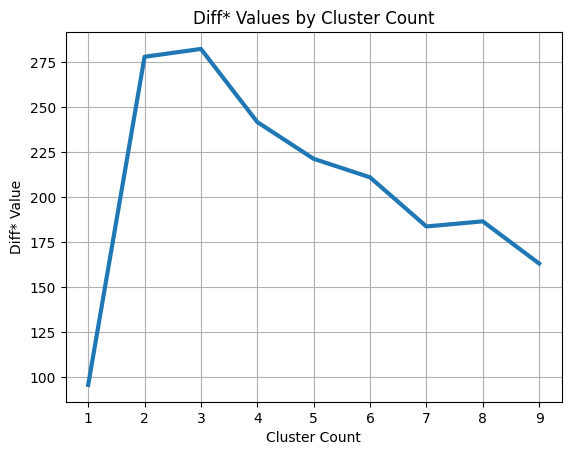

In [ ]:
optimal_k_obj = OptimalK(parallel_backend='joblib')
optimal_k_obj(X, cluster_array=np.arange(1, 11))

optimal_k = optimal_k_obj.n_clusters

optimal_k_obj.plot_results()

In [ ]:
K = 3

kmeans = KMeans(n_clusters=K)

kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

#print(cluster_centers)
#print(labels)

radius_threshold = 1.2

In [ ]:
cluster_centers

array([[4.39354839, 1.43387097, 5.9016129 , 2.7483871 ],
       [1.462     , 0.246     , 5.006     , 3.428     ],
       [5.74210526, 2.07105263, 6.85      , 3.07368421]])

In [ ]:
cluster_assignments = []
for data_point in X:
    assigned_clusters = []
    for center in cluster_centers:
        distance = np.linalg.norm(np.array(center) - np.array(data_point, dtype=float))
        if distance < radius_threshold:
            assigned_clusters.append(center)
    cluster_assignments.append(assigned_clusters)

In [ ]:
df = pd.DataFrame(X, columns = ['Attribute_1', 'Attribute_2', 'Attribute_3', 'Attribute_4'])
df['Cluster_assigned(With overlapping)'] = cluster_assignments
df['K means clustering'] = labels
df['Species'] = iris['species']
df.to_csv('results_without_pca.csv')

In [ ]:
def cluster_stability(data, n_clusters, n_runs=10):
    similarities = []
    for _ in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, random_state=None).fit(data)
        similarities.append(jaccard_similarity(kmeans.labels_, kmeans.labels_))
    return np.mean(similarities)

stability_score = cluster_stability(X, n_clusters=3, n_runs=10)
print("Cluster Stability Score:", stability_score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Cluster Stability Score: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# For Stock market dataset:

### With PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

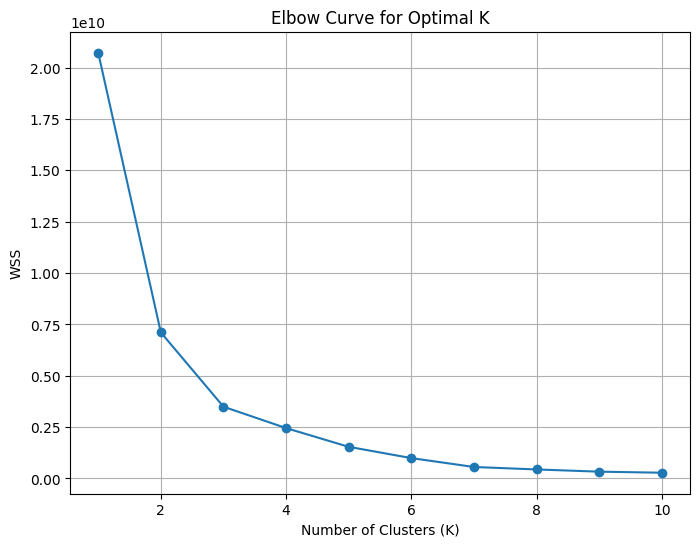

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read the dataset
Original_Dataset = pd.read_excel('StockData2.xlsx')
Dataset = Original_Dataset.iloc[:, 2:9]

# Standardize the data
# sc = StandardScaler()
# Dataset = sc.fit_transform(_Dataset_)

# Apply PCA to reduce to 2D if more than 2 columns
if Dataset.shape[1] > 2:
    pca = PCA(n_components=2)
    X = pca.fit_transform(Dataset)
else:
    X = Dataset

# Elbow Curve for Optimal K
inertia_values = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WSS')
plt.grid(True)
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Silhouette Score')

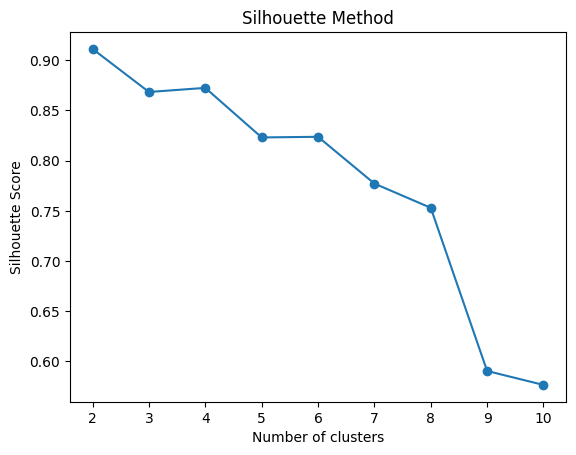

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

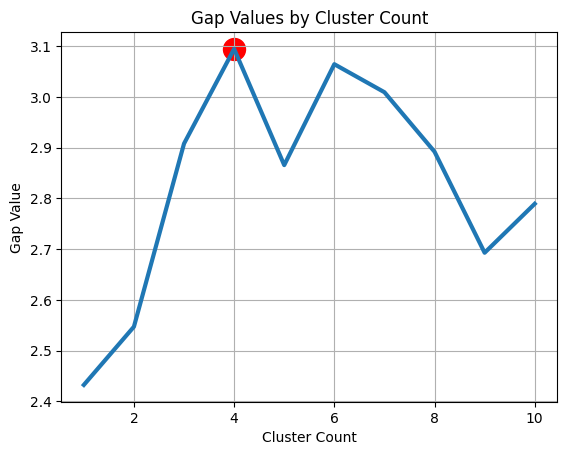

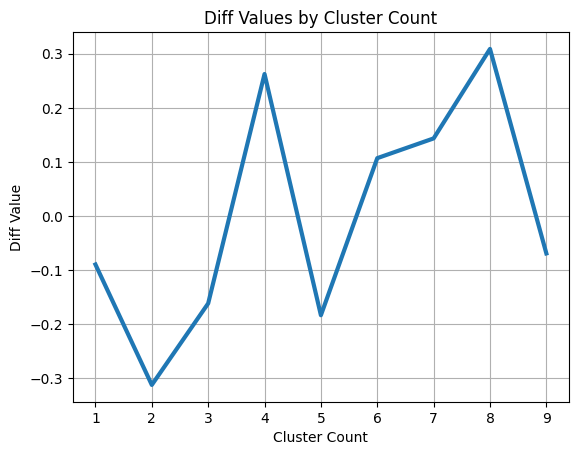

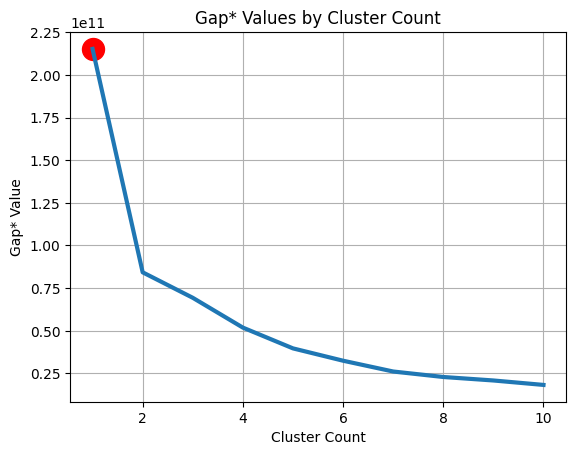

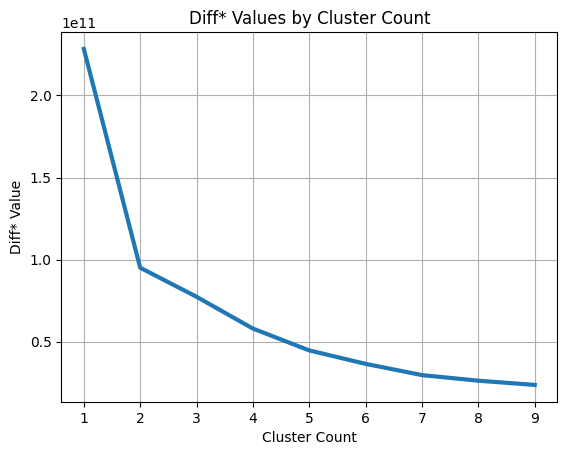

In [ ]:
optimal_k_obj = OptimalK(parallel_backend='joblib')
optimal_k_obj(X, cluster_array=np.arange(1, 11))

optimal_k = optimal_k_obj.n_clusters

optimal_k_obj.plot_results()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


20078.027473007325


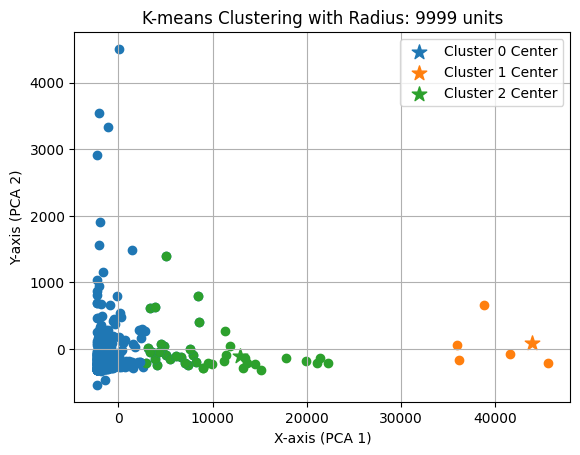

Cluster 0 Statistics:
                P/E  Debt to Equity          EPS          BVPS  \
count    466.000000      466.000000   466.000000    466.000000   
mean     141.276416        0.484850    39.723777    313.851137   
std      869.963144        1.288819    97.000839   1556.310248   
min        0.000000        0.000000     0.000000      0.000000   
25%       13.232500        0.000000     5.740000     59.507500   
50%       34.215000        0.065000    15.310000    129.750000   
75%       69.065000        0.360000    37.390000    266.967500   
max    15323.330000       10.130000  1526.340000  32493.560000   

       Net Profit (Cr)    DPS (rs)         ROE  
count       466.000000  466.000000  466.000000  
mean        896.158798   13.541395   17.391073  
std        1338.584799   41.059753   33.977162  
min           0.000000    0.000000    0.000000  
25%         145.500000    0.370000    6.705000  
50%         414.500000    3.000000   13.410000  
75%        1044.500000    9.000000   20.

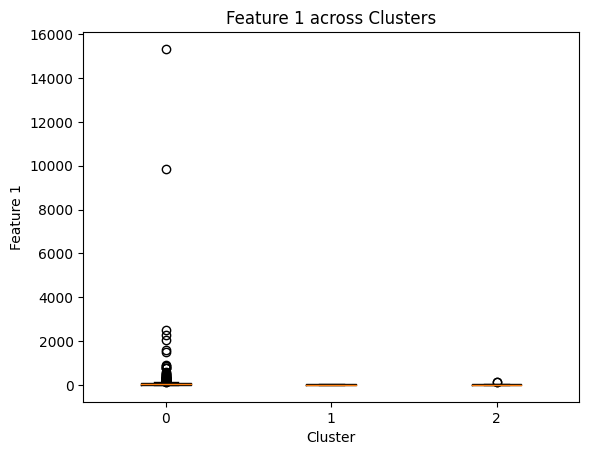

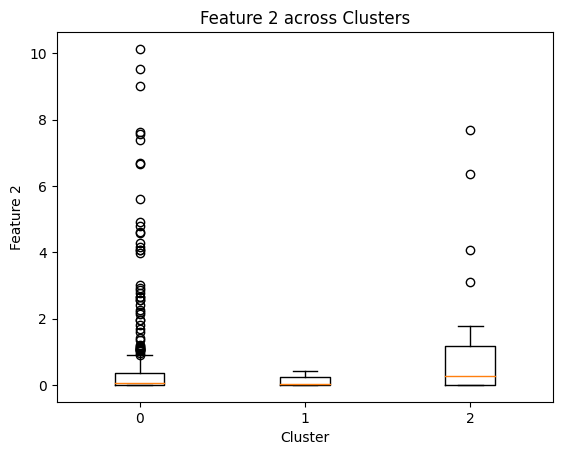

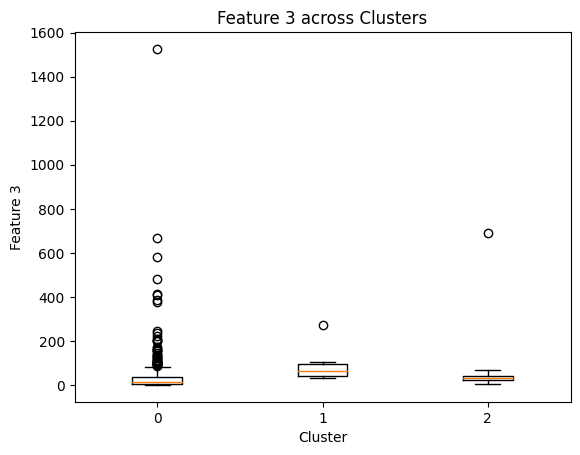

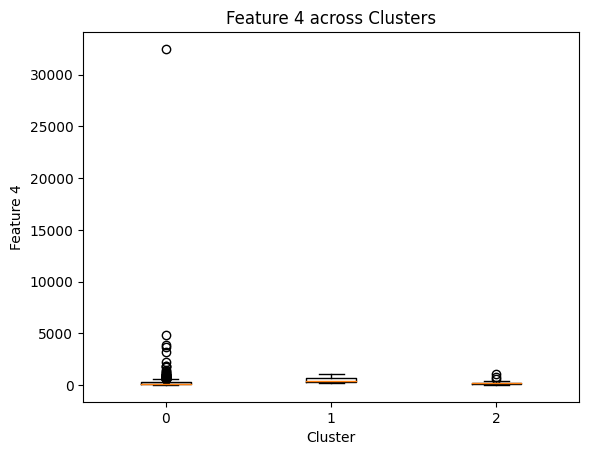

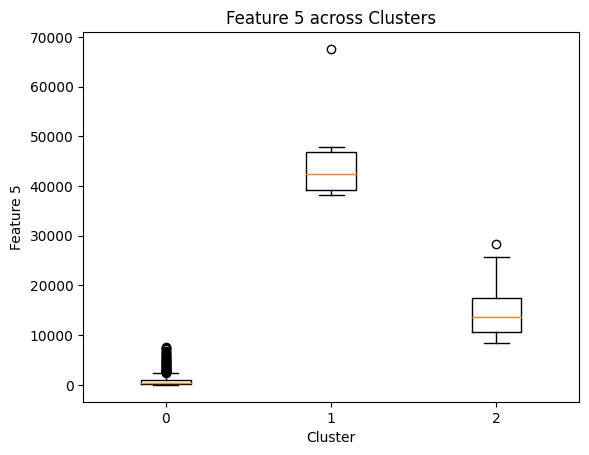

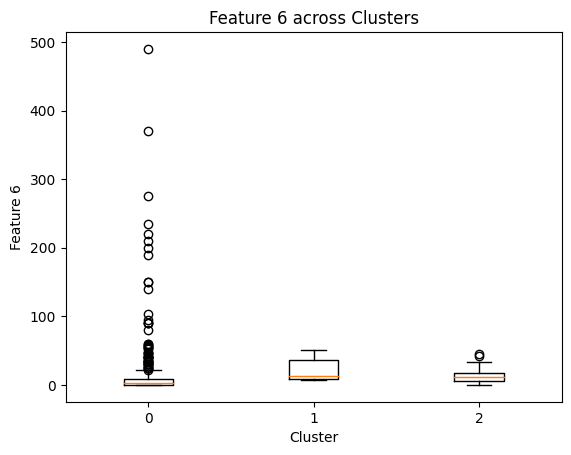

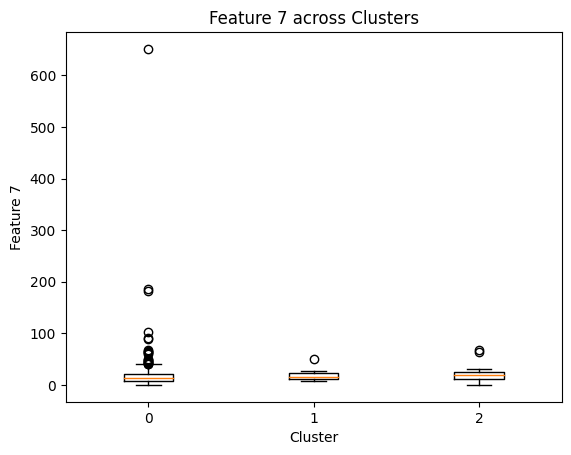

In [ ]:
# Choose the optimal K based on the elbow curve and perform K-means clustering
optimal_K = 3  # Choose based on the elbow curve
kmeans = KMeans(n_clusters=optimal_K, init = 'k-means++')
kmeans.fit(X)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
radius_threshold = 9999
d = 0
# Assign data points to clusters based on radius threshold
cluster_assignments = []
for data_point in X:
    assigned_clusters = []
    for center in cluster_centers:
        distance = np.linalg.norm(data_point - center)
        d += distance
        if distance < radius_threshold:
            assigned_clusters.append(center)
    cluster_assignments.append(assigned_clusters)
print(d/1503)
# Plot clusters
for i in range(len(cluster_assignments)):
    x, y = X[i]
    for cluster in cluster_assignments[i]:
        cluster_idx = np.where((cluster_centers == cluster).all(axis=1))[0][0]
        plt.scatter(x, y, c=f'C{cluster_idx}', marker='o', alpha = 1)

for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=f'C{i}', marker='*', s=120, label=f'Cluster {i} Center')

plt.title('K-means Clustering with Radius: ' + str(radius_threshold) + ' units')
plt.xlabel('X-axis (PCA 1)')
plt.ylabel('Y-axis (PCA 2)')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame with results and save to CSV
df = pd.DataFrame(X, columns=['Attribute_1', 'Attribute_2'])
df['Cluster_assigned(With overlapping)'] = cluster_assignments
df['K means clustering'] = labels
df['Stock'] = Original_Dataset.iloc[:,0]
df['Sector'] = Original_Dataset.iloc[:,10]
df.to_csv('results.csv')

cluster_data = {}
for cluster_label in np.unique(labels):
    cluster_data[cluster_label] = Dataset.iloc[labels == cluster_label]

# Print cluster statistics
for cluster_label, data_points in cluster_data.items():
    cluster_stats = data_points.describe()
    print(f"Cluster {cluster_label} Statistics:")
    print(cluster_stats)

# Visualize cluster characteristics
for feature_idx in range(Dataset.shape[1]):
    plt.figure()
    plt.boxplot([data.iloc[:, feature_idx] for data in cluster_data.values()], labels=cluster_data.keys())
    plt.xlabel('Cluster')
    plt.ylabel(f'Feature {feature_idx+1}')
    plt.title(f'Feature {feature_idx+1} across Clusters')
    plt.show()

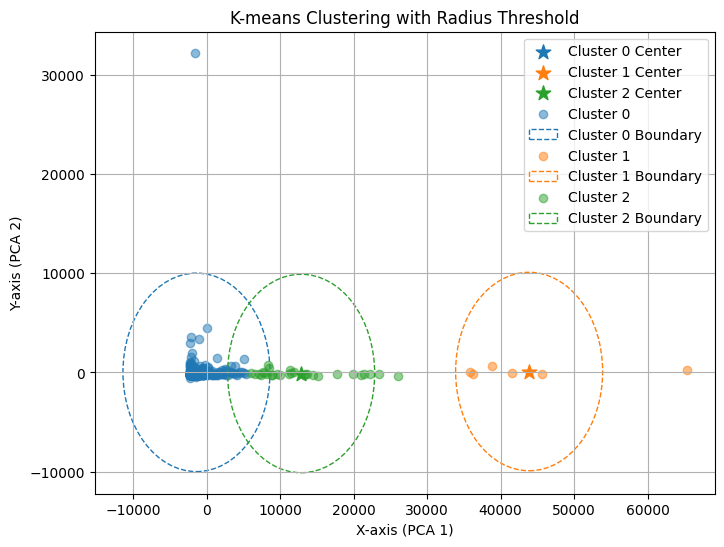

In [ ]:
# Plot cluster boundaries
plt.figure(figsize=(8, 6))

# Plot data points and cluster centers
for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=f'C{i}', marker='*', s=120, label=f'Cluster {i} Center')

# Plot cluster boundaries
for i in range(len(cluster_centers)):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=f'C{i}', marker='o', alpha=0.5, label=f'Cluster {i}')
    # Calculate and plot boundary around cluster
    boundary = plt.Circle(cluster_centers[i], radius_threshold, color=f'C{i}', linestyle='--', fill=False, label=f'Cluster {i} Boundary')
    plt.gca().add_patch(boundary)

plt.title('K-means Clustering with Radius Threshold')
plt.xlabel('X-axis (PCA 1)')
plt.ylabel('Y-axis (PCA 2)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from collections import defaultdict

# Create a dictionary to store overlapping points for each cluster
overlapping_points_per_cluster = defaultdict(list)

# Populate the dictionary with overlapping points for each cluster
for i, assigned_clusters in enumerate(cluster_assignments):
    for cluster in assigned_clusters:
        cluster_idx = np.where((cluster_centers == cluster).all(axis=1))[0][0]
        overlapping_points_per_cluster[cluster_idx].append(X[i])

# Create new clusters based on the mean of overlapping points for each cluster
new_cluster_centers = []
new_labels = []
for cluster_idx, overlapping_points in overlapping_points_per_cluster.items():
    if len(overlapping_points) > 0:
        # Compute the mean of overlapping points for the current cluster
        cluster_mean = np.mean(overlapping_points, axis=0)
        new_cluster_centers.append(cluster_mean)

        # Assign the same label to all overlapping points in the new cluster
        new_labels.extend([cluster_idx] * len(overlapping_points))

# Convert lists to numpy arrays
new_cluster_centers = np.array(new_cluster_centers)
new_labels = np.array(new_labels)

# Add new clusters to existing clusters
cluster_centers = np.vstack([cluster_centers, new_cluster_centers])
labels = np.hstack([labels, new_labels + max(labels) + 1])

In [ ]:
cluster_centers

array([[-1.36607025e+03,  5.70895119e+00],
       [ 4.38831116e+04,  8.88200655e+01],
       [ 1.28720713e+04, -1.10113505e+02],
       [-1.19623973e+03, -6.18286002e+01],
       [ 9.30090577e+03, -2.19232395e+01],
       [ 3.95991164e+04,  5.37393883e+01]])

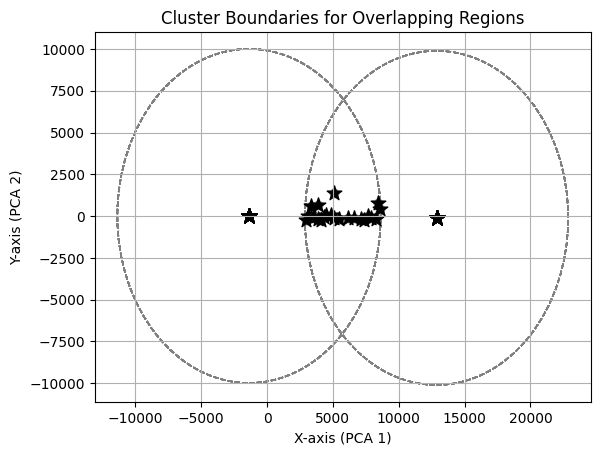

In [ ]:
# Extract overlapping points and calculate mean for each region
overlapping_points = []
for i, data_point in enumerate(X):
    if len(cluster_assignments[i]) > 1:
        overlapping_points.append(data_point)

overlapping_regions = {}
for region_center in set(tuple(center) for center in overlapping_points):
    points_in_region = [point for point in overlapping_points if (point == region_center).all()]
    overlapping_regions[tuple(region_center)] = np.mean(points_in_region, axis=0)

# Plot clusters and cluster boundaries for overlapping regions
for i, data_point in enumerate(X):
    x, y = data_point
    assigned_clusters = cluster_assignments[i]
    if len(assigned_clusters) > 1:
        for cluster in assigned_clusters:
            plt.scatter(x, y, c='gray', marker='o', alpha=0.5)  # Data points in overlapping region
            plt.scatter(cluster[0], cluster[1], c='black', marker='*', s=120)  # Cluster center
            circle = plt.Circle(cluster, radius=radius_threshold, color='gray', fill=False, linestyle='--')  # Cluster boundary
            plt.gca().add_patch(circle)

# Plot cluster centroids for overlapping regions
for region_center, _ in overlapping_regions.items():
    plt.scatter(region_center[0], region_center[1], c='black', marker='*', s=120)  # Overlapping region center

plt.title('Cluster Boundaries for Overlapping Regions')
plt.xlabel('X-axis (PCA 1)')
plt.ylabel('Y-axis (PCA 2)')
plt.grid(True)
plt.show()

In [ ]:
new_cluster_data = {}

# Extract data points belonging to new clusters
for i, data_point in enumerate(X):
    if len(cluster_assignments[i]) > 1:
        for cluster in cluster_assignments[i]:
            cluster_label = tuple(cluster)
            if cluster_label not in new_cluster_data:
                new_cluster_data[cluster_label] = []
            new_cluster_data[cluster_label].append(Original_Dataset.iloc[i])

# Print data points for each new cluster
for cluster_label, data_points in new_cluster_data.items():
    print(f"New Cluster with centroid at {cluster_label}:")
    for data_point in data_points:
        print(data_point)
    print("\n")


New Cluster with centroid at (-1366.0702509141454, 5.708951190560962):
Stock Name                    Bajaj Auto
LTP                              5259.35
P/E                                21.04
Debt to Equity                       0.0
EPS                                173.6
BVPS                              921.62
Net Profit (Cr)                     5586
DPS (rs)                           140.0
ROE                                18.81
Face Value                            10
sector             Auto 0 2 & 3 Wheelers
Name: 47, dtype: object
Stock Name                 Bajaj Finserv
LTP                               1560.0
P/E                               863.27
Debt to Equity                       0.0
EPS                                 11.2
BVPS                              238.84
Net Profit (Cr)                     7367
DPS (rs)                             3.0
ROE                                  4.7
Face Value                             5
sector             Finance 0 Investments
Nam

Observations:

For example, a stock like "Adani Enterprises" might be identified as part of both the "Infrastructure" and "Renewable Energy" clusters. This suggests that it has characteristics relevant to both sectors, potentially indicating a diversified business model.
Risk-Return Profiles:

Stocks like "Tata Motors" and "Sun Pharma" may be part of both high-risk and low-risk clusters. This means they exhibit characteristics associated with both higher and lower risk investments, possibly due to factors like market volatility and industry stability.
Sector Diversification:

Some stocks, like "Reliance" and "Titan Company", might span multiple sectors (e.g., "Oil & Gas" and "Consumer Goods"). This could indicate that these companies have diversified business operations.
Portfolio Optimization:

An investor seeking to optimize their portfolio for a specific risk-return profile may choose to allocate different weights to stocks that appear in multiple clusters. For instance, if "Bajaj Auto" appears in both high-growth and low-risk clusters, an investor may adjust their portfolio allocation accordingly.
Dynamic Investment Approach:

Stocks like "HDFC Bank" or "Infosys" may transition between clusters over time. This suggests that their risk-return characteristics might change due to factors like market conditions, financial performance, or industry trends.
Identifying Anomalies:

Stocks that are assigned to multiple clusters may be considered outliers or anomalies. For example, if "ICICI bank" appears in no clusters, this could be a point of interest for further investigation to understand the underlying factors.

In [ ]:
overlapping_points = [(i, clusters) for i, clusters in enumerate(cluster_assignments) if len(clusters) > 1]
print(len(overlapping_points))
overlapping_points

23


[(47,
  [array([-1366.07025091,     5.70895119]),
   array([12872.07129192,  -110.11350511])]),
 (49,
  [array([-1366.07025091,     5.70895119]),
   array([12872.07129192,  -110.11350511])]),
 (55,
  [array([-1366.07025091,     5.70895119]),
   array([12872.07129192,  -110.11350511])]),
 (67,
  [array([-1366.07025091,     5.70895119]),
   array([12872.07129192,  -110.11350511])]),
 (86,
  [array([-1366.07025091,     5.70895119]),
   array([12872.07129192,  -110.11350511])]),
 (162,
  [array([-1366.07025091,     5.70895119]),
   array([12872.07129192,  -110.11350511])]),
 (180,
  [array([-1366.07025091,     5.70895119]),
   array([12872.07129192,  -110.11350511])]),
 (203,
  [array([-1366.07025091,     5.70895119]),
   array([12872.07129192,  -110.11350511])]),
 (206,
  [array([-1366.07025091,     5.70895119]),
   array([12872.07129192,  -110.11350511])]),
 (207,
  [array([-1366.07025091,     5.70895119]),
   array([12872.07129192,  -110.11350511])]),
 (208,
  [array([-1366.07025091,   

#### Customer Transaction dataset

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

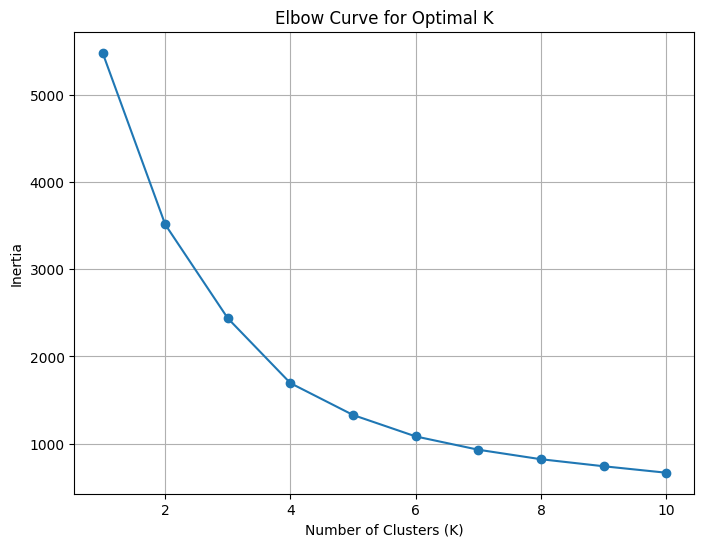

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


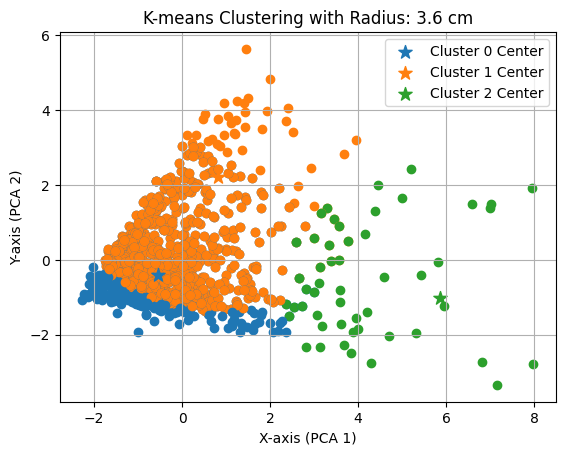

Cluster 0 Statistics:
                0           1           2           3           4           5  \
count  783.000000  783.000000  783.000000  783.000000  783.000000  783.000000   
mean    -0.376667   -0.085970   -0.153917   -0.133331   -0.131037   -0.285687   
std      0.485169    1.085373    0.409587    0.403324    0.546423    0.335901   
min     -0.862796   -4.423263   -0.469719   -0.374017   -0.472912   -0.459968   
25%     -0.783060   -0.045702   -0.446574   -0.374017   -0.472912   -0.459968   
50%     -0.498271    0.440693   -0.307888   -0.315043   -0.394297   -0.459968   
75%     -0.148124    0.440693   -0.035441   -0.057300    0.000348   -0.287501   
max      1.416034    0.440693    1.857088    2.283335    3.914489    1.526781   

                6           7           8           9  
count  783.000000  783.000000  783.000000  783.000000  
mean     0.023053   -0.248455   -0.257937   -0.225716  
std      0.985121    0.856572    0.394526    0.413383  
min     -1.297071   -1.2

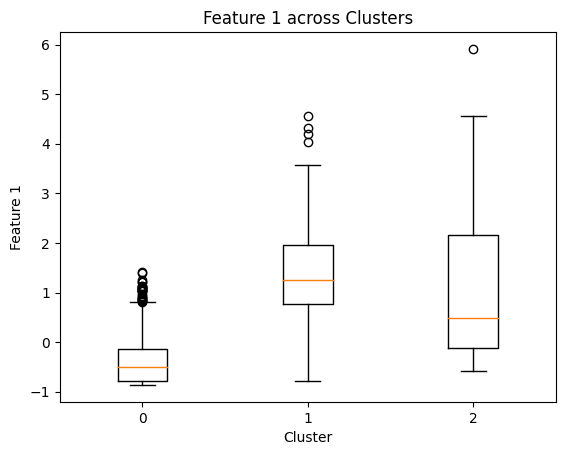

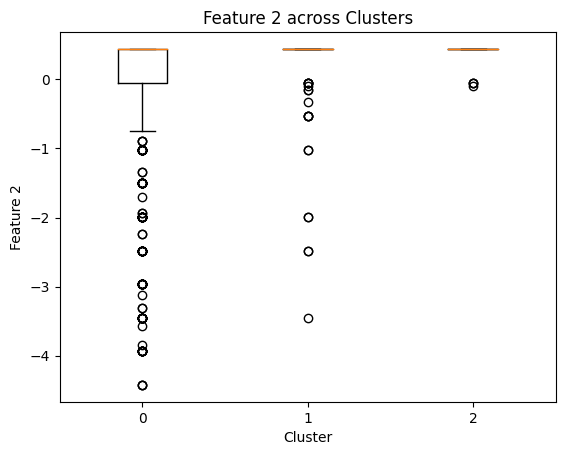

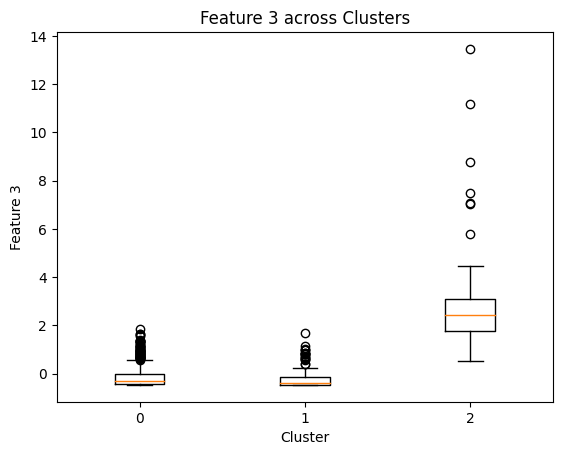

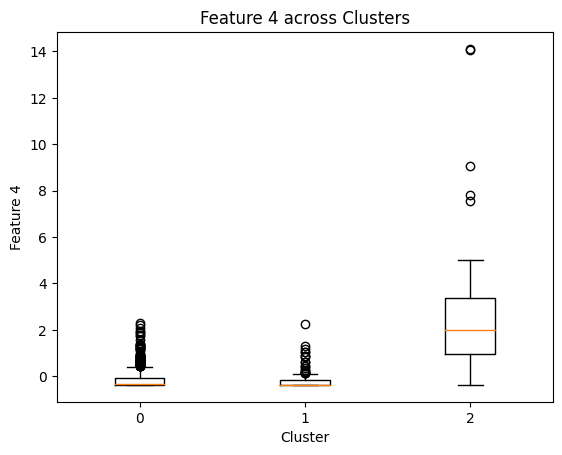

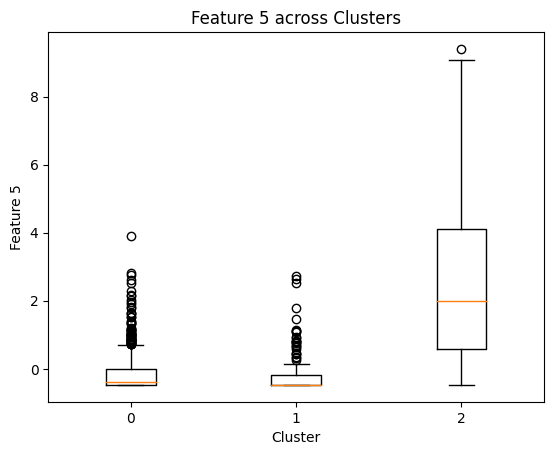

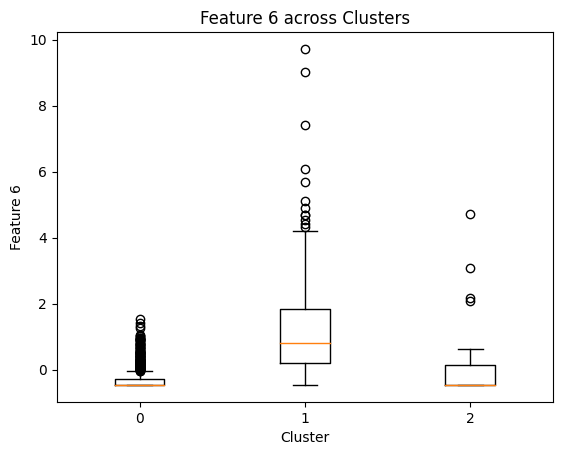

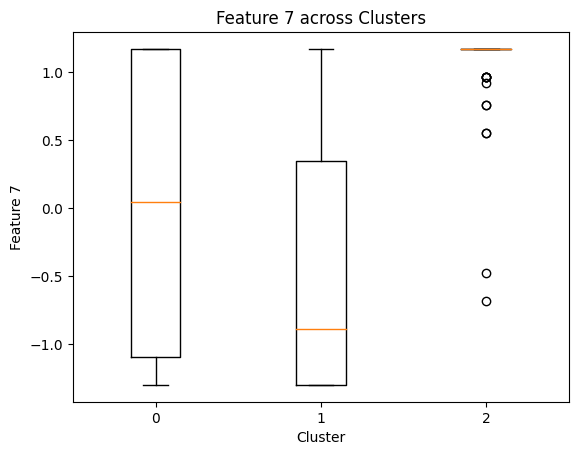

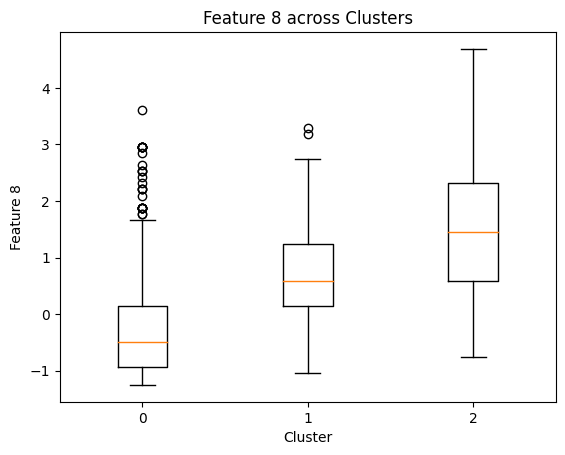

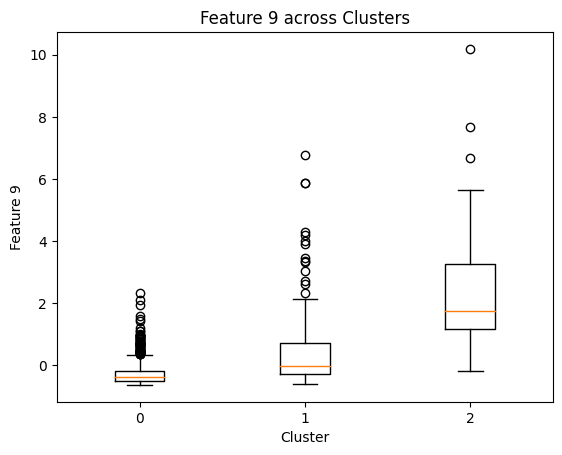

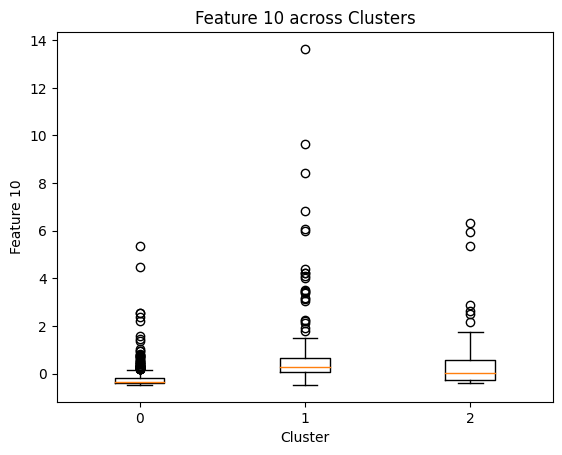

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read the dataset
Original_Dataset = pd.read_excel('Bank.xlsx')
Dataset = Original_Dataset.iloc[:, [1,2,3,4,5,6,7,13,14,15]]

#sc

sc = StandardScaler()
Dataset = sc.fit_transform(Dataset)
Dataset = pd.DataFrame(Dataset)

# Apply PCA to reduce to 2D if more than 2 columns
if len(Dataset.columns) > 2:
    pca = PCA(n_components=2)
    X = pca.fit_transform(Dataset)
else:
    X = Dataset

# Elbow Curve for Optimal K
inertia_values = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Choose the optimal K based on the elbow curve and perform K-means clustering
optimal_K = 3  # Choose based on the elbow curve
kmeans = KMeans(n_clusters=optimal_K)
kmeans.fit(X)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
radius_threshold = 3.6

# Assign data points to clusters based on radius threshold
cluster_assignments = []
for data_point in X:
    assigned_clusters = []
    for center in cluster_centers:
        distance = np.linalg.norm(data_point - center)
        if distance < radius_threshold:
            assigned_clusters.append(center)
    cluster_assignments.append(assigned_clusters)

# Plot clusters
for i in range(len(cluster_assignments)):
    x, y = X[i]
    for cluster in cluster_assignments[i]:
        cluster_idx = np.where((cluster_centers == cluster).all(axis=1))[0][0]
        plt.scatter(x, y, c=f'C{cluster_idx}', marker='o')

for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=f'C{i}', marker='*', s=100, label=f'Cluster {i} Center')

plt.title('K-means Clustering with Radius: ' + str(radius_threshold) + ' cm')
plt.xlabel('X-axis (PCA 1)')
plt.ylabel('Y-axis (PCA 2)')
plt.legend()
plt.grid(True)
plt.show()

# Create a DataFrame with results and save to CSV
df = pd.DataFrame(X, columns=['Attribute_1', 'Attribute_2'])
df['Cluster_assigned(With overlapping)'] = cluster_assignments
df['K means clustering'] = labels
df['Customer_ID'] = Original_Dataset.iloc[:,0]
df.to_csv('results.csv')

cluster_data = {}
for cluster_label in np.unique(labels):
    cluster_data[cluster_label] = Dataset.iloc[labels == cluster_label]

# Print cluster statistics
for cluster_label, data_points in cluster_data.items():
    cluster_stats = data_points.describe()
    print(f"Cluster {cluster_label} Statistics:")
    print(cluster_stats)

# Visualize cluster characteristics
for feature_idx in range(Dataset.shape[1]):
    plt.figure()
    plt.boxplot([data.iloc[:, feature_idx] for data in cluster_data.values()], labels=cluster_data.keys())
    plt.xlabel('Cluster')
    plt.ylabel(f'Feature {feature_idx+1}')
    plt.title(f'Feature {feature_idx+1} across Clusters')
    plt.show()

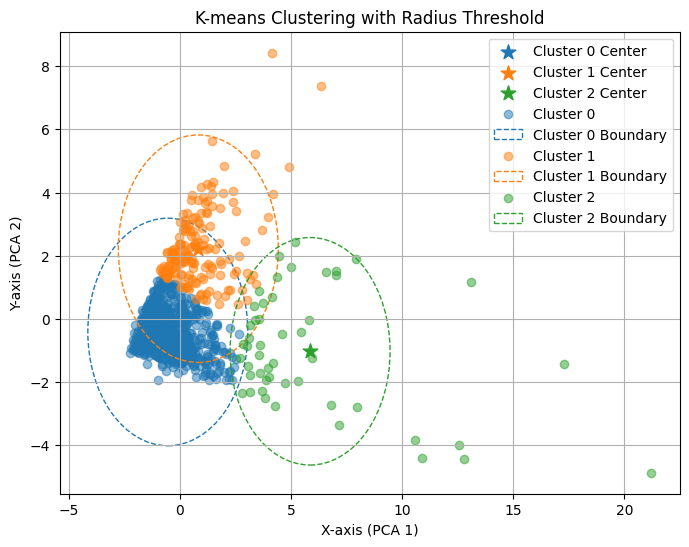

In [ ]:
# Plot cluster boundaries
plt.figure(figsize=(8, 6))

# Plot data points and cluster centers
for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=f'C{i}', marker='*', s=120, label=f'Cluster {i} Center')

# Plot cluster boundaries
for i in range(len(cluster_centers)):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=f'C{i}', marker='o', alpha=0.5, label=f'Cluster {i}')
    # Calculate and plot boundary around cluster
    boundary = plt.Circle(cluster_centers[i], radius_threshold, color=f'C{i}', linestyle='--', fill=False, label=f'Cluster {i} Boundary')
    plt.gca().add_patch(boundary)

plt.title('K-means Clustering with Radius Threshold')
plt.xlabel('X-axis (PCA 1)')
plt.ylabel('Y-axis (PCA 2)')
plt.legend()
plt.grid(True)
plt.show()

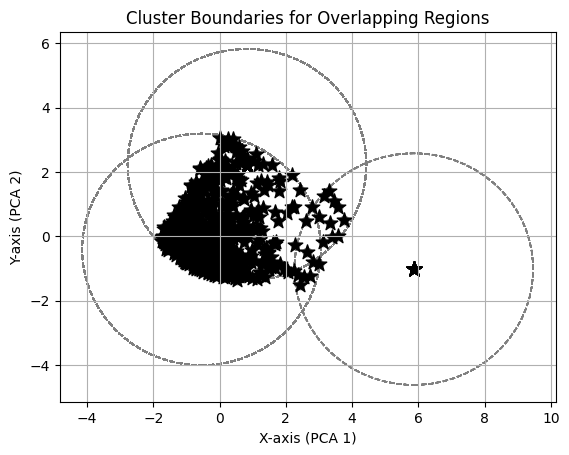

In [ ]:
# Extract overlapping points and calculate mean for each region
overlapping_points = []
for i, data_point in enumerate(X):
    if len(cluster_assignments[i]) > 1:
        overlapping_points.append(data_point)

overlapping_regions = {}
for region_center in set(tuple(center) for center in overlapping_points):
    points_in_region = [point for point in overlapping_points if (point == region_center).all()]
    overlapping_regions[tuple(region_center)] = np.mean(points_in_region, axis=0)

# Plot clusters and cluster boundaries for overlapping regions
for i, data_point in enumerate(X):
    x, y = data_point
    assigned_clusters = cluster_assignments[i]
    if len(assigned_clusters) > 1:
        for cluster in assigned_clusters:
            plt.scatter(x, y, c='gray', marker='o', alpha=0.5)  # Data points in overlapping region
            plt.scatter(cluster[0], cluster[1], c='black', marker='*', s=120)  # Cluster center
            circle = plt.Circle(cluster, radius=radius_threshold, color='gray', fill=False, linestyle='--')  # Cluster boundary
            plt.gca().add_patch(circle)

# Plot cluster centroids for overlapping regions
for region_center, _ in overlapping_regions.items():
    plt.scatter(region_center[0], region_center[1], c='black', marker='*', s=120)  # Overlapping region center

plt.title('Cluster Boundaries for Overlapping Regions')
plt.xlabel('X-axis (PCA 1)')
plt.ylabel('Y-axis (PCA 2)')
plt.grid(True)
plt.show()

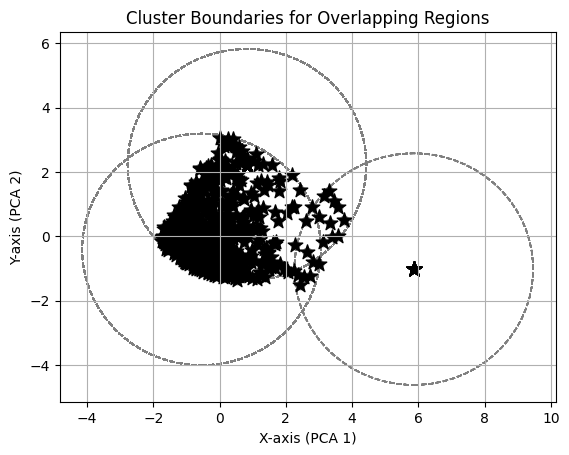

In [ ]:
# Extract overlapping points and calculate mean for each region
overlapping_points = []
for i, data_point in enumerate(X):
    if len(cluster_assignments[i]) > 1:
        overlapping_points.append(data_point)

overlapping_regions = {}
for region_center in set(tuple(center) for center in overlapping_points):
    points_in_region = [point for point in overlapping_points if (point == region_center).all()]
    overlapping_regions[tuple(region_center)] = np.mean(points_in_region, axis=0)

# Plot clusters and cluster boundaries for overlapping regions
for i, data_point in enumerate(X):
    x, y = data_point
    assigned_clusters = cluster_assignments[i]
    if len(assigned_clusters) > 1:
        for cluster in assigned_clusters:
            plt.scatter(x, y, c='gray', marker='o', alpha=0.5)  # Data points in overlapping region
            plt.scatter(cluster[0], cluster[1], c='black', marker='*', s=120)  # Cluster center
            circle = plt.Circle(cluster, radius=radius_threshold, color='gray', fill=False, linestyle='--')  # Cluster boundary
            plt.gca().add_patch(circle)

# Plot cluster centroids for overlapping regions
for region_center, _ in overlapping_regions.items():
    plt.scatter(region_center[0], region_center[1], c='black', marker='*', s=120)  # Overlapping region center

plt.title('Cluster Boundaries for Overlapping Regions')
plt.xlabel('X-axis (PCA 1)')
plt.ylabel('Y-axis (PCA 2)')
plt.grid(True)
plt.show()


### Without PCA:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

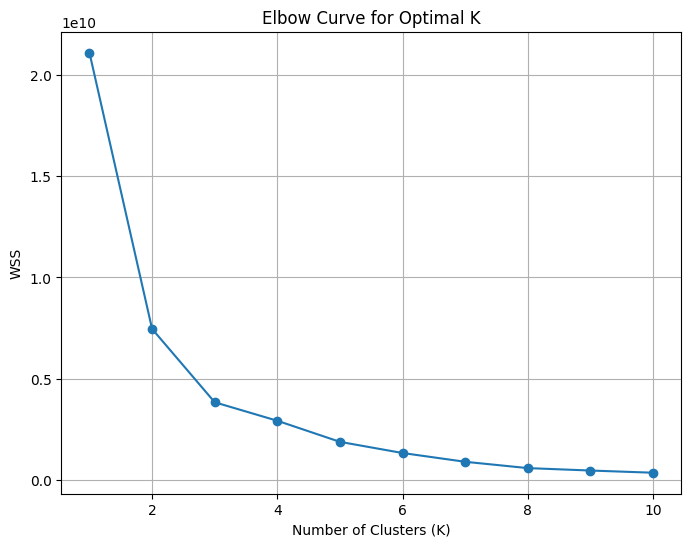

In [ ]:
# Read the dataset
Original_Dataset = pd.read_excel('StockData2.xlsx')
Dataset = Original_Dataset.iloc[:, 2:9]

X = Dataset.values

# Elbow Curve for Optimal K
inertia_values = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Curve for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WSS')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Silhouette Score')

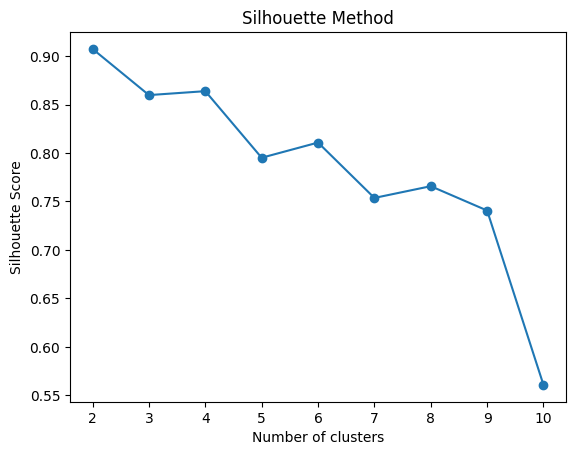

In [ ]:
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

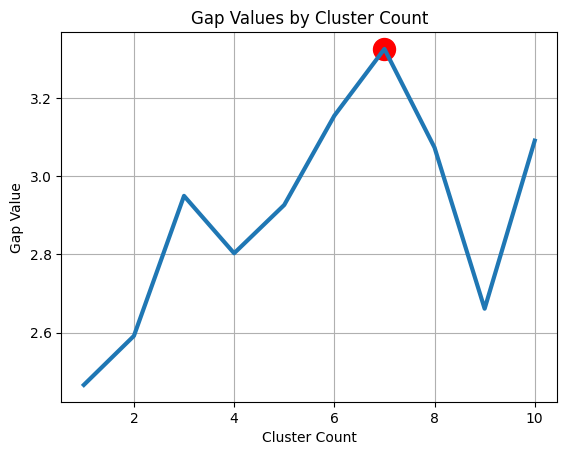

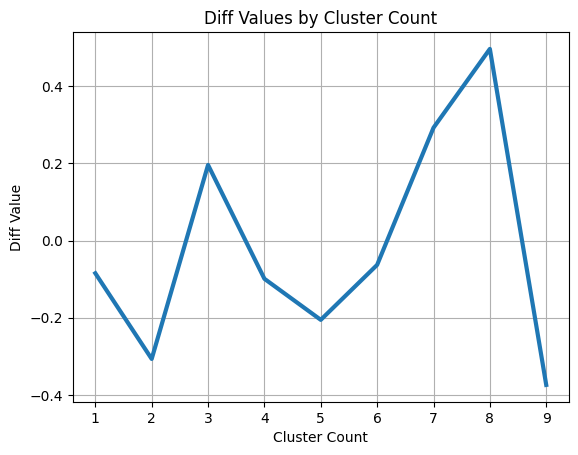

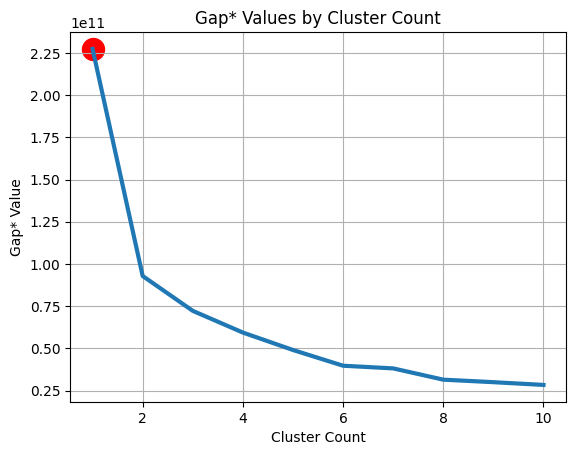

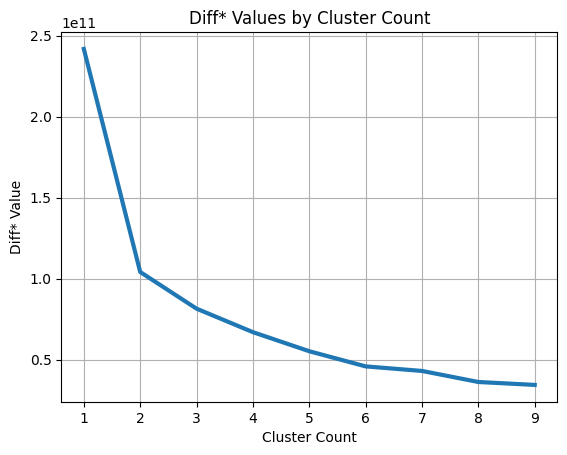

Optimal number of clusters according to Gap Statistic: 7


In [ ]:
optimal_k_obj = OptimalK(parallel_backend='joblib')
optimal_k_obj(X, cluster_array=np.arange(1, 11))

optimal_k = optimal_k_obj.n_clusters

optimal_k_obj.plot_results()

print(f'Optimal number of clusters according to Gap Statistic: {optimal_k}')

In [ ]:
# Choose the optimal K based on the elbow curve and perform K-means clustering
optimal_K = 3  # Choose based on the elbow curve
kmeans = KMeans(n_clusters=optimal_K)
kmeans.fit(X)

# Get cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_
radius_threshold = 11000

d_n_p = 0
# Assign data points to clusters based on radius threshold
cluster_assignments_without_pca = []
for data_point in X:
    assigned_clusters = []
    for center in cluster_centers:
        distance = np.linalg.norm(np.array(data_point, dtype = float) - np.array(center))
        d_n_p += distance

        if distance < radius_threshold:
            assigned_clusters.append(center)
    cluster_assignments_without_pca.append(assigned_clusters)
print(d_n_p/1503)

20112.543343317513


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
cluster_assignments_without_pca

[[array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+02,
         8.96158798e+02, 1.35413948e+01, 1.73910730e+01])],
 [array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+02,
         8.96158798e+02, 1.35413948e+01, 1.73910730e+01])],
 [array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+02,
         8.96158798e+02, 1.35413948e+01, 1.73910730e+01])],
 [array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+02,
         8.96158798e+02, 1.35413948e+01, 1.73910730e+01])],
 [array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+02,
         8.96158798e+02, 1.35413948e+01, 1.73910730e+01])],
 [array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+02,
         8.96158798e+02, 1.35413948e+01, 1.73910730e+01])],
 [array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+02,
         8.96158798e+02, 1.35413948e+01, 1.73910730e+01])],
 [array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+

Cluster 0 Statistics:
                P/E  Debt to Equity          EPS          BVPS  \
count    466.000000      466.000000   466.000000    466.000000   
mean     141.276416        0.484850    39.723777    313.851137   
std      869.963144        1.288819    97.000839   1556.310248   
min        0.000000        0.000000     0.000000      0.000000   
25%       13.232500        0.000000     5.740000     59.507500   
50%       34.215000        0.065000    15.310000    129.750000   
75%       69.065000        0.360000    37.390000    266.967500   
max    15323.330000       10.130000  1526.340000  32493.560000   

       Net Profit (Cr)    DPS (rs)         ROE  
count       466.000000  466.000000  466.000000  
mean        896.158798   13.541395   17.391073  
std        1338.584799   41.059753   33.977162  
min           0.000000    0.000000    0.000000  
25%         145.500000    0.370000    6.705000  
50%         414.500000    3.000000   13.410000  
75%        1044.500000    9.000000   20.

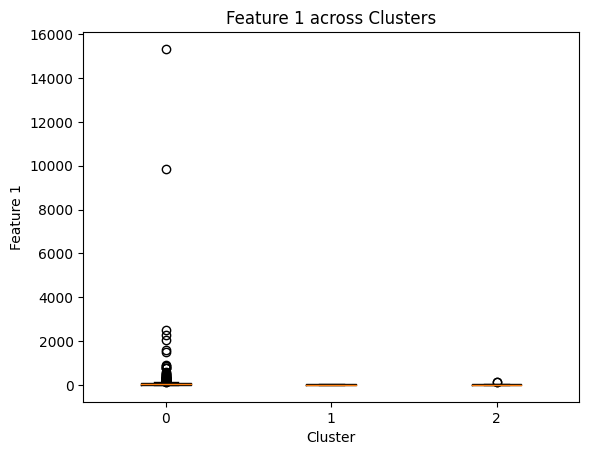

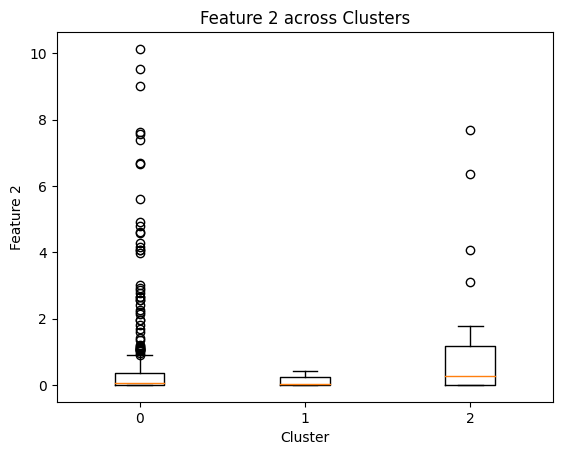

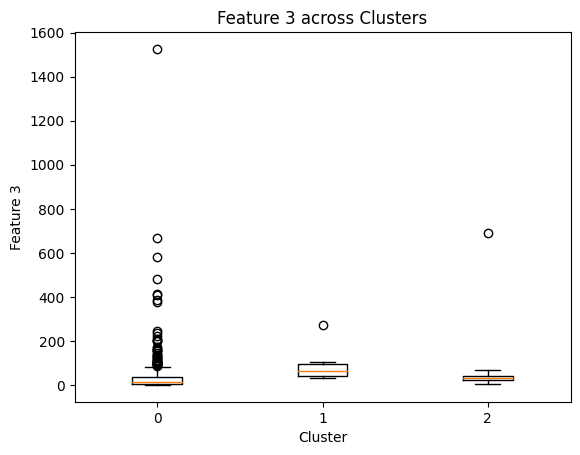

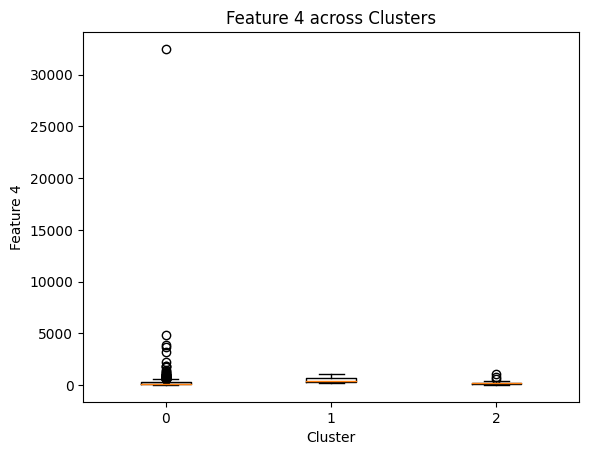

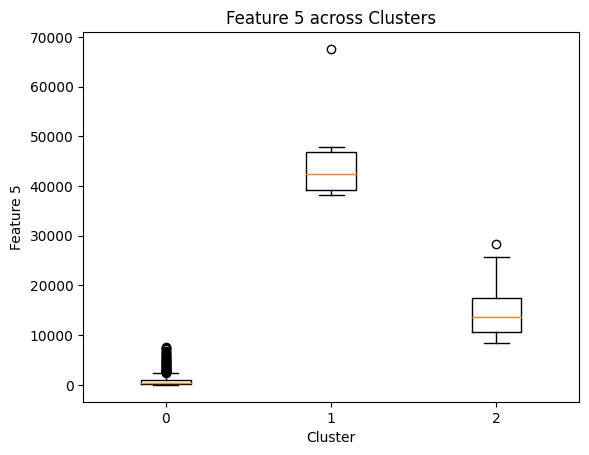

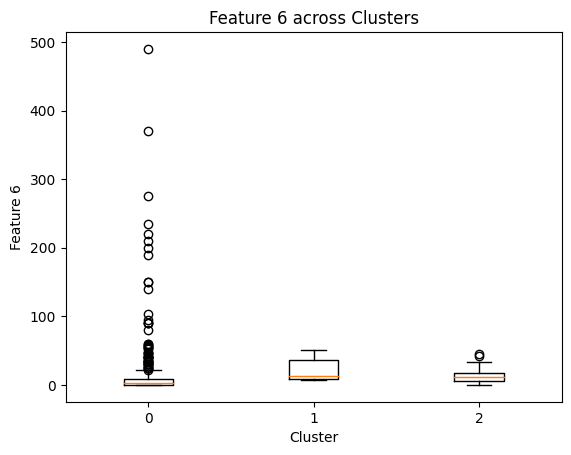

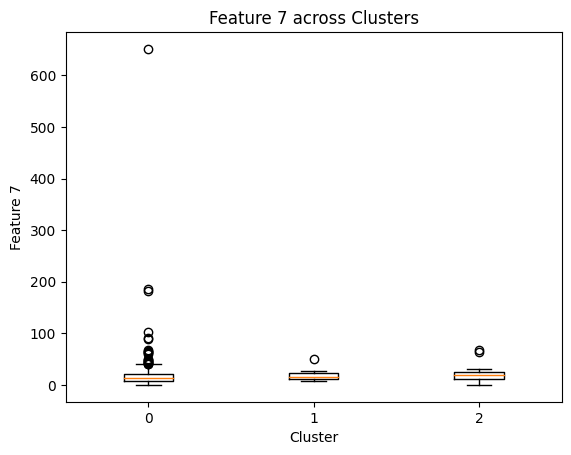

In [ ]:
df = pd.DataFrame(X, columns=['Attribute_1', 'Attribute_2', 'Attribute_3', 'Attribute_4', 'Attribute_5', 'Attribute_6', 'Attribute_7'])
df['Cluster_assigned(With overlapping)'] = cluster_assignments_without_pca
df['K means clustering'] = labels
df['Stock'] = Original_Dataset.iloc[:,0]
df['Sector'] = Original_Dataset.iloc[:,10]
df.to_csv('results_without_pca.csv')

cluster_data = {}
for cluster_label in np.unique(labels):
    cluster_data[cluster_label] = Dataset.iloc[labels == cluster_label]

# Print cluster statistics
for cluster_label, data_points in cluster_data.items():
    cluster_stats = data_points.describe()
    print(f"Cluster {cluster_label} Statistics:")
    print(cluster_stats)

# Visualize cluster characteristics
for feature_idx in range(Dataset.shape[1]):
    plt.figure()
    plt.boxplot([data.iloc[:, feature_idx] for data in cluster_data.values()], labels=cluster_data.keys())
    plt.xlabel('Cluster')
    plt.ylabel(f'Feature {feature_idx+1}')
    plt.title(f'Feature {feature_idx+1} across Clusters')
    plt.show()

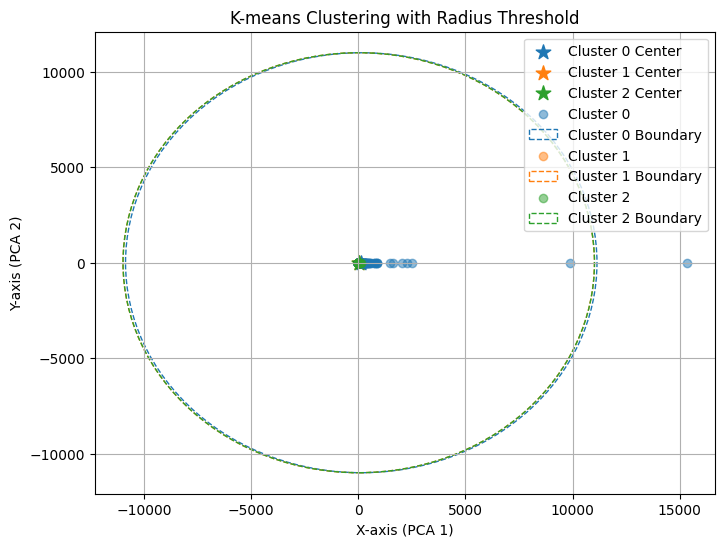

In [ ]:
# Plot cluster boundaries
plt.figure(figsize=(8, 6))

# Plot data points and cluster centers
for i, center in enumerate(cluster_centers):
    plt.scatter(center[0], center[1], c=f'C{i}', marker='*', s=120, label=f'Cluster {i} Center')

# Plot cluster boundaries
for i in range(len(cluster_centers)):
    plt.scatter(X[labels == i][:, 0], X[labels == i][:, 1], c=f'C{i}', marker='o', alpha=0.5, label=f'Cluster {i}')
    # Calculate and plot boundary around cluster
    boundary = plt.Circle(cluster_centers[i], 11000, color=f'C{i}', linestyle='--', fill=False, label=f'Cluster {i} Boundary')
    plt.gca().add_patch(boundary)

plt.title('K-means Clustering with Radius Threshold')
plt.xlabel('X-axis (PCA 1)')
plt.ylabel('Y-axis (PCA 2)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
overlapping_points = [(i, clusters) for i, clusters in enumerate(cluster_assignments_without_pca) if len(clusters) > 1]
print(overlapping_points)
len(overlapping_points)

[(11, [array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+02,
       8.96158798e+02, 1.35413948e+01, 1.73910730e+01]), array([2.55679310e+01, 1.09448276e+00, 5.37955172e+01, 2.22235517e+02,
       1.51341034e+04, 1.33482759e+01, 2.02551724e+01])]), (12, [array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+02,
       8.96158798e+02, 1.35413948e+01, 1.73910730e+01]), array([2.55679310e+01, 1.09448276e+00, 5.37955172e+01, 2.22235517e+02,
       1.51341034e+04, 1.33482759e+01, 2.02551724e+01])]), (47, [array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+02,
       8.96158798e+02, 1.35413948e+01, 1.73910730e+01]), array([2.55679310e+01, 1.09448276e+00, 5.37955172e+01, 2.22235517e+02,
       1.51341034e+04, 1.33482759e+01, 2.02551724e+01])]), (48, [array([1.41276416e+02, 4.84849785e-01, 3.97237768e+01, 3.13851137e+02,
       8.96158798e+02, 1.35413948e+01, 1.73910730e+01]), array([2.55679310e+01, 1.09448276e+00, 5.37955172e+01, 2.22235517e+02,
  

35